In [5]:
from scipy import stats
from functools import partial
from matplotlib import pyplot 
%matplotlib inline

dist_continuous = [d for d in dir(stats) if isinstance(getattr(stats,d), stats.rv_continuous)]
dist_discrete = [d for d in dir(stats) if isinstance(getattr(stats,d), stats.rv_discrete)]

print "CONTINUOUS"
print dist_continuous
print "\nDISCRETE"
print dist_discrete

def cumSum(L,y):
    L.append(y+L[len(L)-1])
    return L
def cumE(L,y):
    L.append(y/float(len(L)+1))
    return L
def cumSum2(L,y):
    L.append(y**2+L[len(L)-1])
    return L
def cumVar(L,y,E):
    i = len(L)
    L.append(y/float(len(L)+1) - E[i]**2)
    return L

def sampleCumE(S):
    sums = reduce(cumSum, S[1:N], [S[0]])
    E = reduce(cumE, sums[1:N], [sums[0]])
    return E

def sampleCumVar(S,E):
    sums2 = reduce(cumSum2, S[1:N], [S[0]**2])
    V = reduce(partial(cumVar,E=E), sums2[1:N], [sums2[0]-E[0]**2])
    return V

def plotSampleEVar(S, ax=None):
    E = sampleCumE(S)
    Var = sampleCumVar(S,E)
    N = len(E)
    fig = pyplot.figure()
    if not ax:
        ax = fig.add_subplot(1,1,1)
    ax.set_xscale('log')
    ax.plot(E)
    ax.plot(Var, 'r')
    ax.set_title("E[X] = {0}, Var[X]={1}".format(E[N-1], Var[N-1]))
  
def plotFunction(t, f, domain, ax=None):
    raynge = [f(k) for k in domain]
    if not ax:
        fig = pyplot.figure()
        ax = fig.add_subplot(1,1,1)
    ax.plot(domain,raynge)
    ax.set_title(t)

def plotPMF(name, rv, l, r, ax=None):
    t = name + " Probability Mass Function"
    plotFunction(t, rv.pmf, range(l,r+1), ax)
    
def plotPDF(name, rv, start = -10, stop = 10, delta = 1, ax = None):
    t = name + " Probability Density Function"
    steps = (stop-start)/float(delta) + 1
    domain = [(start + i*delta) for i in range(0,int(steps))] 
    plotFunction(t,rv.pdf, domain, ax)
    
def plotCDF(name, rv, l, r, delta=None, ax=None):
    t = name + " Cummulative Distribution Function"
    if delta:
        steps = (r-l)/float(delta) + 1
        domain = [(l + i*delta) for i in range(0,int(steps))] 
        plotFunction(t,rv.cdf, domain, ax) 
    else: plotFunction(t, rv.cdf, range(l,r+1), ax)

CONTINUOUS
['alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncf', 'nct', 'ncx2', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'reciprocal', 'rice', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 

<h2>Discrete Random Variables</h2>
<h3>Bernoulli Random Variable</h3>
Given an experiment with two possible outcomes, *S* and *F* (thought of as success and failure), with probability *p* for *S* and *1-p* for *F*, the **Bernoulli** random variable *X* is 

$$X =  \left\{ \begin{eqnarray} 1, \quad \mbox{if} & S \cr
0, \quad \mbox{if} & F
\end{eqnarray} \right.$$

It's PMF is given by 

$$p_X\left(k\right) = \left\{ \begin{eqnarray} p, \quad \mbox{if} & k=1 \cr
1-p \quad \mbox{if} & k=0
\end{eqnarray} \right.$$

Related quantities

$$E\left[X\right] = p$$

$$var\left(X\right) = p\left(1-p\right)$$

Theoreticals: E[X]=0.25, Var[X]=0.1875


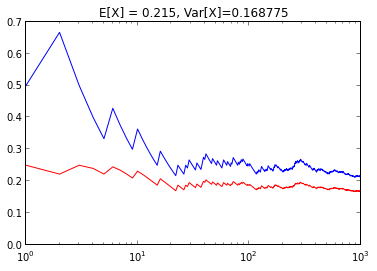

In [2]:
from scipy.stats import bernoulli
p = .25
rv = bernoulli(p)
N=1000
print "Theoreticals: E[X]={0}, Var[X]={1}".format(rv.mean(), rv.var())
plotSampleEVar(rv.rvs(size=N))

<h3>Binomial Random Variable</h3>
Given an experiment with two possible outcomes, *S* and *F*, with probability *p* for *S* and *1-p* for *F*, that is repeated *n* times, the **Binomial** random variable is the number of experiments resulting in an *S* outcome denoted by *k*, i.e. the number of successes in *n* trials. It's PMF is given by

$$p_X\left(k\right) = {n \choose k} p^k \left(1-p\right)^{n-k} \quad k=0,1,\ldots,n$$

Related values

$$E\left[X\right] = np$$

$$var\left(X\right) = np\left(1-p\right)$$

Theoreticals: E[X]=2.5, Var[X]=1.875


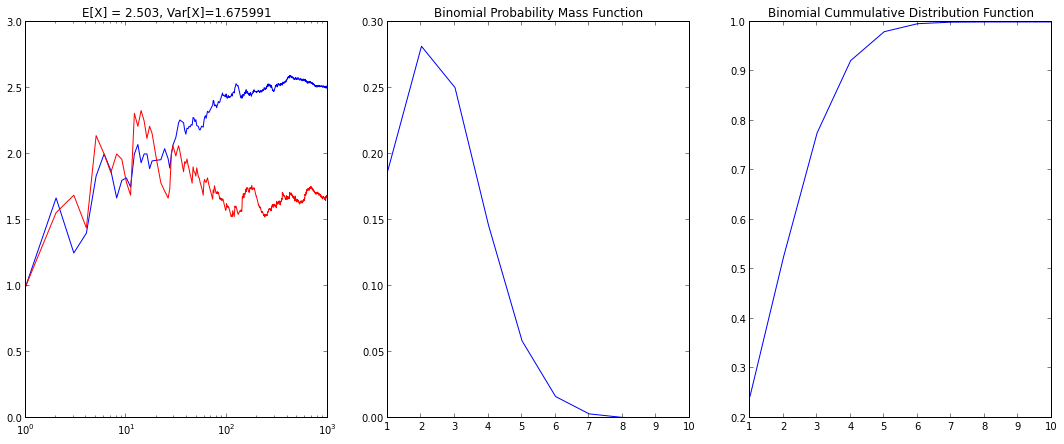

In [3]:
from scipy.stats import binom
n = 10
k = 4
rv = binom(n,p)
N = 1000
print "Theoreticals: E[X]={0}, Var[X]={1}".format(rv.mean(), rv.var())

f,axarr = pyplot.subplots(1,3)
f.subplots_adjust(right=2.5)
f.subplots_adjust(top=1.5)
plotSampleEVar(rv.rvs(size=N),axarr[0])
plotPMF("Binomial", rv, 1, 10, ax=axarr[1])
plotCDF("Binomial", rv, 1, 10, ax=axarr[2])

<h3>Geometric Random Variable</h3>
Given an experiment with two possible outcomes, *S* and *F*, with probability *p* for *S* and *1-p* for *F*, that is repeated until an *S* outcome is observed, the **Geometric** random variable is the number of experiments required including the *S*, i.e. the number of trials required to reach the first success. It's PMF is given by

$$p_X\left(k\right) = p \left(1-p\right)^{k-1}$$

Related Values:

$$E\left[X\right] = \frac{1}{p}$$

$$var\left(X\right) = \frac{1-p}{p^2}$$

CDF:
$$F_X\left(k\right) = 1-(1-p)^n$$

Theoreticals: E[X]=4.0, Var[X]=12.0


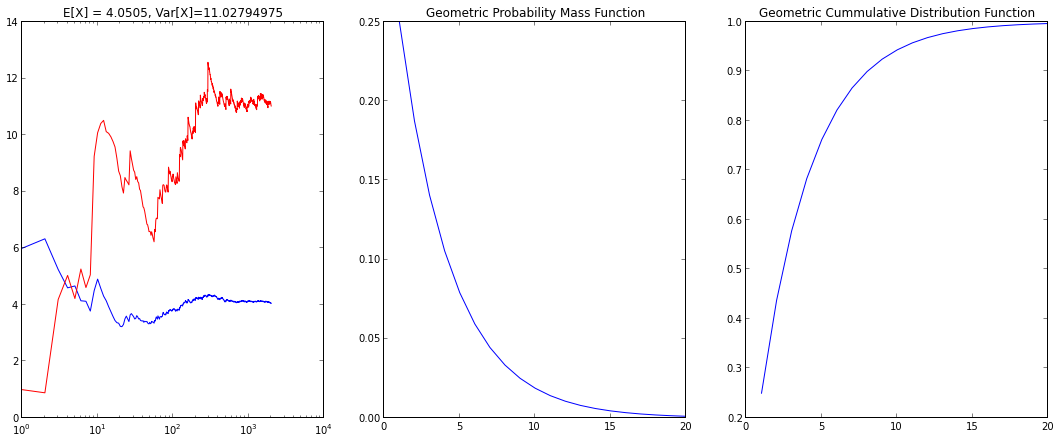

In [4]:
from scipy.stats import geom
p = 0.25
rv = geom(p)
N = 2000

print "Theoreticals: E[X]={0}, Var[X]={1}".format(rv.mean(), rv.var())
f,axarr = pyplot.subplots(1,3)
f.subplots_adjust(right=2.5)
f.subplots_adjust(top=1.5)
plotSampleEVar(rv.rvs(size=N),axarr[0])
plotPMF("Geometric", rv, 1, 20, ax=axarr[1])
plotCDF("Geometric", rv, 1, 20, ax=axarr[2])

<h3>Poisson Random Variable</h3>
The **Poisson** random variable is a random variable whose PMF is

$$p_X\left(k\right) = e^{-\lambda}\frac{\lambda^k}{k!}$$

where $\lambda\hspace{1pt}$ is a positive parameter characterizing the PMF. The Poisson RV arrises as an **approximation to the Binomial RV**. Given the condition of *large n* and *small p* and $k\ll n \hspace{1pt}$ then letting $\lambda = np \hspace{1pt}$ in the Poisson PMF provides a good approximaiton to the Binomial PMF with parameters *n*, *k*, and *p* with the advantage of a simpler calculation.

Related values:

$$E\left[X\right] = var\left(X\right) = \lambda$$

Theoreticals: E[X]=0.25, Var[X]=0.25


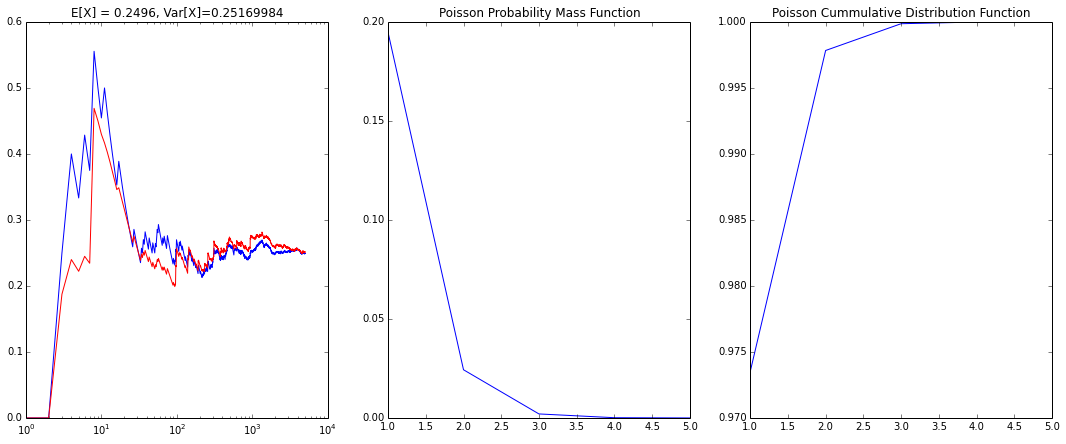

In [7]:
from scipy.stats import poisson
lam = 0.25
rv = poisson(lam)
N = 5000
print "Theoreticals: E[X]={0}, Var[X]={1}".format(rv.mean(), rv.var())
f,axarr = pyplot.subplots(1,3)
f.subplots_adjust(right=2.5)
f.subplots_adjust(top=1.5)
plotSampleEVar(rv.rvs(size=N),axarr[0])
plotPMF("Poisson", rv, 1, 5, ax=axarr[1])
plotCDF("Poisson", rv, 1, 5, ax=axarr[2])

<h3>Discrete Uniform Random Variable</h3>
A random variable $X$ is a **discrete** uniform random variable if it can take any of *n* values with equal probability, namely $frac{1}{n}\hspace{1pt}$. Assume the values are indexed to (or are) integers in the range $\left[a,b\right]\hspace{1pt}$ then the PMF of *X* is

$$p_X\left(k\right) = \left\{ \begin{eqnarray} \frac{1}{b-a+1}&,& \quad \mbox{if} \hspace{3pt} k=a,a+1,\ldots,b \cr
0&,& \quad\mbox{otherwise} \end{eqnarray}\right.$$

Related values:

$$E\left[X\right] = \frac{a+b}{2}$$

$$var\left(X\right) = \frac{\left(b-a\right)\left(b-a+2\right)}{12}$$

<h2>Continuous Random Variables</h2>
<h3>Continuous Uniform Random Variable</h3>
A random variable *X* is a **continous** uniform if it can take all values in the interval $\left[a,b\right]\hspace{1pt}$ and the probability of *any two equal length intervals* is the same, so that the PDF is

$$f_X\left(x\right) = \left\{ \begin{eqnarray} \frac{1}{b-a}&,& \quad \mbox{if} \hspace{3pt} a\le x \le b \cr
0&,& \quad\mbox{otherwise} \end{eqnarray}\right.$$

Related values:

$$E\left[X\right]= \frac{a+b}{2}$$

$$var\left(X\right) = \frac{\left(b-a\right)^2}{12}$$

Theoreticals: E[X]=0.5, Var[X]=0.75


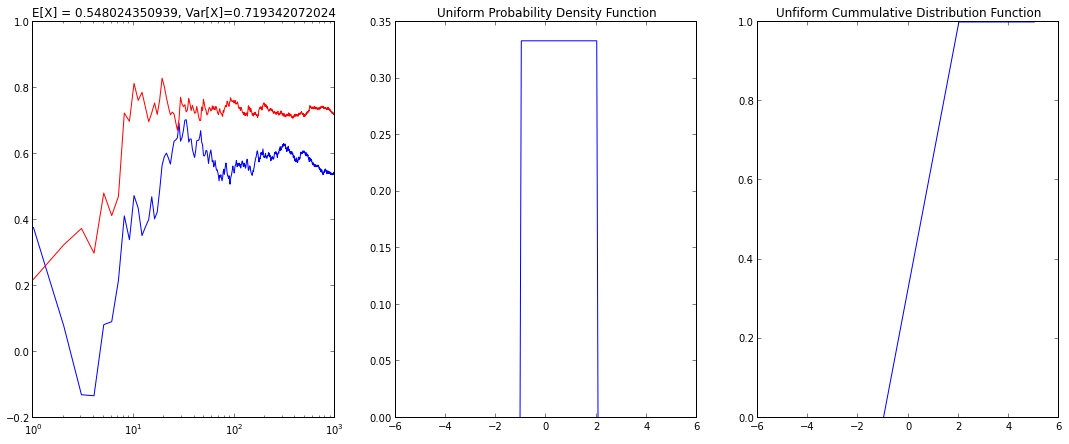

In [6]:
from scipy.stats import uniform
a=-1
b=2
rv = uniform(loc=a,scale=(b-a))
#This distribution is constant between loc and loc + scale.
N = 1000
print "Theoreticals: E[X]={0}, Var[X]={1}".format(rv.mean(), rv.var())
f,axarr = pyplot.subplots(1,3)
f.subplots_adjust(right=2.5)
f.subplots_adjust(top=1.5)
plotSampleEVar(rv.rvs(size=N),axarr[0])
plotPDF("Uniform", rv, -5, 5, .05, ax=axarr[1])
plotCDF("Unfiform", rv, -5, 5, .01, ax=axarr[2])

<h3>Exponential Random Variable</h3>

An exponential RV has PDF

$$f_X\left(x\right) = \left\{ \begin{eqnarray} \lambda e^{-\lambda x}&,& \quad \mbox{if} \hspace{3pt} x \ge 0 \cr
0&,& \quad\mbox{otherwise} \end{eqnarray}\right.$$ 

Note that we require $\lambda \gt 0$

Related Values:

$$E\left[X\right] = \frac{1}{\lambda}$$

$$var\left(X\right) = \frac{1}{\lambda^2}$$

CDF:
$$F_X\left(x\right)=\int_0^{\infty}\lambda\exp^{-\lambda t}dt=1-\exp^{-\lambda t}$$

Theoreticals: E[X]=4.0, Var[X]=16.0


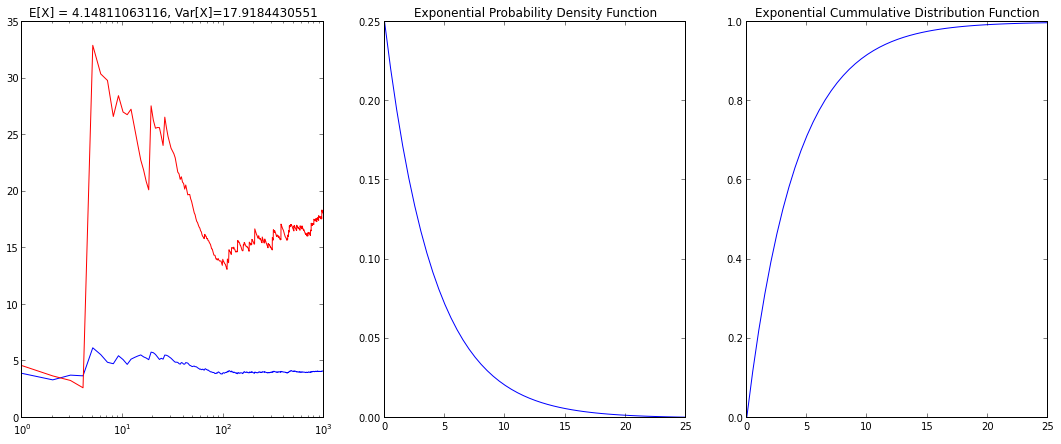

In [15]:
from scipy.stats import expon
#The scale parameter is equal to scale = 1.0 / lambda.
lam = .25
scale = 1.0 / lam
rv = expon(scale=scale)
N = 1000
print "Theoreticals: E[X]={0}, Var[X]={1}".format(rv.mean(), rv.var())
f,axarr = pyplot.subplots(1,3)
f.subplots_adjust(right=2.5)
f.subplots_adjust(top=1.5)
plotSampleEVar(rv.rvs(size=N),axarr[0])
plotPDF("Exponential", rv, 0, 25, .5, ax=axarr[1])
plotCDF("Exponential", rv, 0, 25, .5, ax=axarr[2])

<h3>Normal Random Variable</h3>

A continuous random variable *X* is **normal** or **Gaussian** if it has a PDF of the form

$$f_X\left(x\right) = \frac{1}{\sqrt{2\pi}\sigma} e^{\left(x-\mu\right)^2/2\sigma^2}$$

Related Values

$$E\left[X\right] = \mu$$

$$var\left(X\right) = \sigma^2$$

The RV *Y* is said to be a **standard normal** if it is normally distributed with zero mean and unit variance. Given any normally distributed random variable, *X* with mean $\mu\hspace{1pt}$ and variance $\sigma^2\hspace{1pt}$ and noting that *normality is preserved by linear transformations*, we can obtain a *standardized* form of *X* as follows

$$Y = \frac{X-\mu}{\sigma}$$

$$E\left[Y\right] = \frac{E\left[X\right]-\mu}{\sigma}=0$$

$$var\left(Y\right) = \frac{var\left(X\right)}{\sigma^2}=1$$

Finally, the CDF of *X* can be obtained from the standard normal CDF, $\Phi\left(y\right)\hspace{1pt}$, by 

$$P\left(X\le x\right) = P\left(\frac{X-\mu}{\sigma}\le \frac{x-\mu}{\sigma}\right)=P\left(Y\le \frac{x-\mu}{\sigma}\right) = \Phi\left(\frac{x-\mu}{\sigma}\right)$$

Theoreticals: E[X]=1.0, Var[X]=9.0


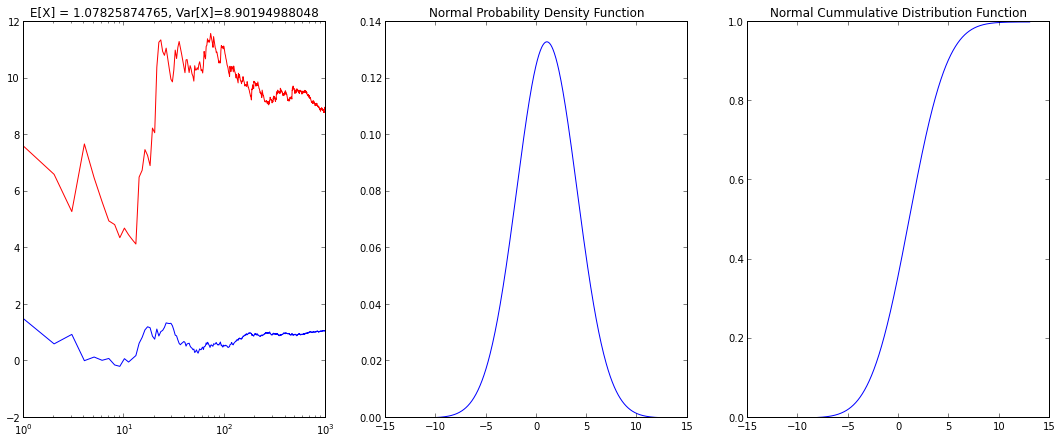

In [25]:
from scipy.stats import norm
#The scale parameter is equal to scale = mu, loc = sigma = standard deviation
mu = 1
sig = 3
rv = norm(loc=mu,scale=sig)
N = 1000
print "Theoreticals: E[X]={0}, Var[X]={1}".format(rv.mean(), rv.var())
f,axarr = pyplot.subplots(1,3)
f.subplots_adjust(right=2.5)
f.subplots_adjust(top=1.5)
plotSampleEVar(rv.rvs(size=N),axarr[0])
plotPDF("Normal", rv, mu-4*sig, mu+4*sig, .05, ax=axarr[1])
plotCDF("Normal", rv, mu-4*sig, mu+4*sig, .01, ax=axarr[2])